In [1]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 30.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 50.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.7/263.7 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 43.9 MB/s eta 0:00:0000:01:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 31.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.31.10-py3-none-any.whl size=25312982 sha256=d1d7bf0cdc2c388f16f222e74a679be1422f45c1a1e7d2170fa13d75f96f2f62
  Stored in

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID';
os.environ['CUDA_VISIBLE_DEVICES'] = '0';

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import ktrain
from ktrain import text
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from keras import optimizers
import tensorflow as tf

In [4]:
!git clone 'https://github.com/anirudhv14/SDCNL.git'

Cloning into 'SDCNL'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 63 (delta 27), reused 16 (delta 3), pack-reused 0
Unpacking objects: 100% (63/63), 1.87 MiB | 3.43 MiB/s, done.


In [5]:
# data_new = pd.read_csv('suicide_vs_depression.csv')
data_train = pd.read_csv('./SDCNL/data/processed_train.csv', index_col=0, ).dropna()
data_test = data = pd.read_csv('./SDCNL/data/processed_test.csv', index_col=0, ).dropna()

In [6]:
data_train.head(2)

,selftext,processed_selftext,is_suicide
0,I've been feeling really depressed and lonely ...,feeling really depressed lonely lately job ful...,0
1,I literally broke down crying and asked to go ...,literally broke crying asked go home another n...,0


In [7]:
data_test.head(2)

,selftext,processed_selftext,is_suicide
23,Any song which you like which makes you feel g...,song like makes feel good good day,0
29,I find it difficult right now to believe a per...,find difficult right believe person depressed ...,0


In [8]:
categories = ['depression', 'suicide']

In [9]:
# Choose your test size to split between training and testing sets:
X_train, X_val, y_train, y_val = train_test_split(data_train.selftext.values, data_train.is_suicide.values, test_size=0.25, random_state=42)

X_test = data_test.selftext.values
y_test = data_test.is_suicide.values

In [10]:
X_train.shape

(1134,)

## BERT Classification

In [11]:
model_name = 'roberta-large'

trans = text.Transformer(model_name=model_name, maxlen = 256, class_names = categories)

Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

In [12]:
train_data = trans.preprocess_train(X_train, y_train)
val_data = trans.preprocess_train(X_val, y_val)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 178
	95percentile : 538
	99percentile : 992


Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing train...
language: en
train sequence lengths:
	mean : 169
	95percentile : 498
	99percentile : 1213


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 157
	95percentile : 458
	99percentile : 799


In [13]:
reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    mode='auto',
    min_delta=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1,
    mode='auto')

callback = [reduce_learning, eary_stopping]

In [14]:
model = trans.get_classifier()

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

In [15]:
# model1 = trans.get_model()

In [16]:
# hist = model.fit(x = train_data.x, y = train_data.y, validation_data = (val_data.x, val_data.y), callbacks = callback)

In [17]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = val_data, batch_size=8)

In [18]:
callback

In [19]:
hist = learner.fit_onecycle(1e-5, 40, cycle_momentum = True, callbacks = callback)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/40
142/142 [==============================] - 177s 1s/step - loss: 0.6942 - accuracy: 0.5282 - val_loss: 0.6846 - val_accuracy: 0.5277
Epoch 2/40
142/142 [==============================] - 137s 961ms/step - loss: 0.6461 - accuracy: 0.6376 - val_loss: 0.5907 - val_accuracy: 0.7361
Epoch 3/40
142/142 [==============================] - 137s 961ms/step - loss: 0.5609 - accuracy: 0.7293 - val_loss: 0.5659 - val_accuracy: 0.7441
Epoch 4/40
142/142 [==============================] - 137s 961ms/step - loss: 0.4876 - accuracy: 0.7813 - val_loss: 0.5730 - val_accuracy: 0.7361
Epoch 5/40
142/142 [==============================] - 136s 960ms/step - loss: 0.3682 - accuracy: 0.8510 - val_loss: 0.6059 - val_accuracy: 0.7493
Epoch 6/40
142/142 [==============================] - 137s 961ms/step - loss: 0.2662 - accuracy: 0.8959 - val_loss: 0.6481 - val_accuracy: 0.7309

Epoch 00006: ReduceLROnPlateau reducing learning rate to 7.3999

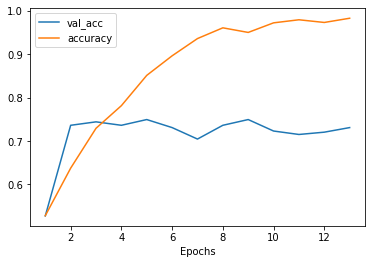

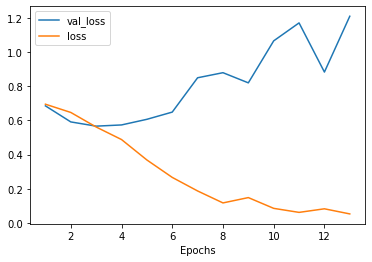

In [20]:
plt.plot(list(range(1,len(hist.history['val_accuracy'])+1)), hist.history['val_accuracy'])
plt.plot(list(range(1,len(hist.history['accuracy'])+1)), hist.history['accuracy'])
plt.legend(['val_acc', 'accuracy'])
plt.xlabel("Epochs")
plt.show()

plt.figure()
plt.plot(list(range(1,len(hist.history['val_loss'])+1)), hist.history['val_loss'])
plt.plot(list(range(1,len(hist.history['loss'])+1)), hist.history['loss'])
plt.legend(['val_loss', 'loss'])
plt.xlabel("Epochs")
plt.show()

In [21]:
# hist = learner.autofit(1e-4, 20, True)

In [22]:
# plt.plot(list(range(1,len(hist.history['val_accuracy'])+1)), hist.history['val_accuracy'])
# plt.plot(list(range(1,len(hist.history['accuracy'])+1)), hist.history['accuracy'])
# plt.legend(['val_acc', 'accuracy'])
# plt.xlabel("Epochs")
# plt.show()

# plt.figure()
# plt.plot(list(range(1,len(hist.history['val_loss'])+1)), hist.history['val_loss'])
# plt.plot(list(range(1,len(hist.history['loss'])+1)), hist.history['loss'])
# plt.legend(['val_loss', 'loss'])
# plt.xlabel("Epochs")
# plt.show()

In [23]:
learner.validate(class_names = categories)

              precision    recall  f1-score   support

  depression       0.71      0.72      0.72       179
     suicide       0.75      0.74      0.74       200

    accuracy                           0.73       379
   macro avg       0.73      0.73      0.73       379
weighted avg       0.73      0.73      0.73       379



array([[129,  50],
       [ 52, 148]])

In [24]:
out = learner.view_top_losses(10, preproc = trans)

----------
id:53 | loss:8.01 | true:depression | pred:suicide)

----------
id:114 | loss:7.75 | true:depression | pred:suicide)

----------
id:229 | loss:7.74 | true:depression | pred:suicide)

----------
id:16 | loss:7.63 | true:suicide | pred:depression)

----------
id:313 | loss:7.57 | true:suicide | pred:depression)

----------
id:94 | loss:7.38 | true:depression | pred:suicide)

----------
id:311 | loss:7.36 | true:suicide | pred:depression)

----------
id:323 | loss:7.3 | true:depression | pred:suicide)

----------
id:27 | loss:7.27 | true:depression | pred:suicide)

----------
id:158 | loss:7.27 | true:depression | pred:suicide)



In [24]:
out = [53, 114, 229, 16, 313, 94, 311, 323, 27, 158]

In [25]:
for num in out:
    print('Text:', X_val[num], '\n\n')
    print('Predicted:', ktrain.get_predictor(learner.model, preproc = trans).predict(X_val[num]), '\n\n')
    if(np.argmax(val_data.y[num])):
        print('Actual: suicide', '\n\n\n\n')
    else:
        print('Actual: depression', '\n\n\n\n')

Text: Give me one good reason I should not kill myself right now. The whole world is going to shit and no one can change that. The only people that could help refuse to. The world will never be a good place, it will always be on the brink. Everyone always says to just look on the bright side, but what is the point? For every good thing you could say, I could name off 3 bad things. Why shouldn’t I just end it right now and save myself the trouble. Everyone dies eventually, there is no point in being afraid of the inevitable. I house I can’t afford will be underwater anyways, if were not all dead by the time I need one. Everyone always says that I shouldn’t kill myself because people would be sad. Welp, I’m not a good person. I’m selfish, rude, hopeless, and just annoying in general. As is everyone. To me there is no point in prolonging the inevitable. So please if you have a good actual answer that is not just “some people would be inconvenienced” than please tell me. 


Predicted: suic

In [26]:
# ktrain.get_predictor(learner.model, preproc = trans).predict(data_train.loc[262].processed_selftext)

In [27]:
# data_train.iloc[262].is_suicide

In [28]:
y_pred = ktrain.get_predictor(learner.model, preproc = trans).predict(X_test)

In [29]:
# y_pred = predictor.predict(X_test)

In [30]:
y_pred_t = []
for i in y_pred:
    y_pred_t.append(1 if(i == 'suicide') else 0)

              precision    recall  f1-score   support

  depression       0.72      0.69      0.71       185
     suicide       0.72      0.75      0.73       193

    accuracy                           0.72       378
   macro avg       0.72      0.72      0.72       378
weighted avg       0.72      0.72      0.72       378



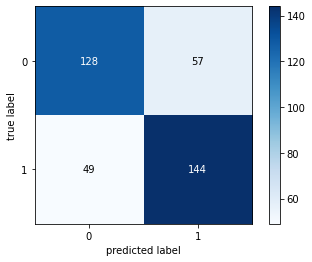

In [31]:
in1 = y_pred_t
true_classes = y_test
class_labels = categories #[str(i) for i in range(2)]
predicted_classes = (in1)
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)
cm1 = confusion_matrix(true_classes,predicted_classes)
#print(cm2)
#Visualizing confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm1, colorbar=True)
plt.show()